In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the MobileNetV2 base model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensionality
x = Dense(128, activation="relu")(x)  # Fully connected layer
output_layer = Dense(90, activation="softmax")(x)  # Output layer for 90 classes

# Create the full model
model = Model(inputs=base_model.input, outputs=output_layer)

# Summarize the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,433,562 (9.28 MB)

 Trainable params: 175,578 (685.85 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Assuming `source_dir` contains the split dataset directories: "train", "val", "test"
source_dir = "dataset_split"

# Path to the train, validation, and test directories
train_dir = os.path.join(source_dir, "train")
val_dir = os.path.join(source_dir, "val")
test_dir = os.path.join(source_dir, "test")

# Create ImageDataGenerator instances for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to the range [0, 1]
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Random horizontal flips
    fill_mode="nearest"  # Fill in any missing pixels after transformation
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for validation

# Create the training and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to training images
    target_size=(224, 224),  # Resize images to match the model input size
    batch_size=32,  # Number of images per batch
    class_mode="categorical"  # For multi-class classification (use "binary" for binary classification)
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,  # Path to validation images
    target_size=(224, 224),  # Resize images to match the model input size
    batch_size=32,  # Number of images per batch
    class_mode="categorical"  # For multi-class classification
)

# Optionally, create a test generator if you want to evaluate on the test dataset
test_generator = val_datagen.flow_from_directory(
    test_dir,  # Path to test images
    target_size=(224, 224),  # Resize images to match the model input size
    batch_size=32,  # Number of images per batch
    class_mode="categorical"  # For multi-class classification
)


Found 3780 images belonging to 90 classes.
Found 810 images belonging to 90 classes.
Found 810 images belonging to 90 classes.


In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compile the model (if not already done)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
checkpoint_cb = ModelCheckpoint(
    "best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1
)
early_stopping_cb = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True, verbose=1
)


In [4]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint_cb, early_stopping_cb],
    verbose=1
)



d:\Projects\big data\GUIModel\GUIModel\GUIModel\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1682 - loss: 3.8592

d:\Projects\big data\GUIModel\GUIModel\GUIModel\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.68148, saving model to best_model.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.1696 - loss: 3.8520 - val_accuracy: 0.6815 - val_loss: 1.3881
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7077 - loss: 1.1956
Epoch 2: val_accuracy improved from 0.68148 to 0.77901, saving model to best_model.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.7078 - loss: 1.1952 - val_accuracy: 0.7790 - val_loss: 0.9188
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7849 - loss: 0.8171
Epoch 3: val_accuracy did not improve from 0.77901
119/119 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.7849 - loss: 0.8171 - val_accuracy: 0.7790 - val_loss: 0.8292
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8290 - loss: 0.6108
Epoch 4: val_accuracy improved from 0.77901 to 0.82469, saving model to best_model.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.8290 - loss: 0.6109

In [5]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 964ms/step - accuracy: 0.8224 - loss: 0.6264
Test Accuracy: 82.84%


26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step
Classification Report:
                precision    recall  f1-score   support

      antelope       0.00      0.00      0.00         9
        badger       0.00      0.00      0.00         9
           bat       0.00      0.00      0.00         9
          bear       0.00      0.00      0.00         9
           bee       0.00      0.00      0.00         9
        beetle       0.00      0.00      0.00         9
         bison       0.00      0.00      0.00         9
          boar       0.00      0.00      0.00         9
     butterfly       0.00      0.00      0.00         9
           cat       0.00      0.00      0.00         9
   caterpillar       0.00      0.00      0.00         9
    chimpanzee       0.00      0.00      0.00         9
     cockroach       0.00      0.00      0.00         9
           cow       0.00      0.00      0.00         9
        coyote       0.00      0.00      0.00         9
          crab       0.00      0.00      

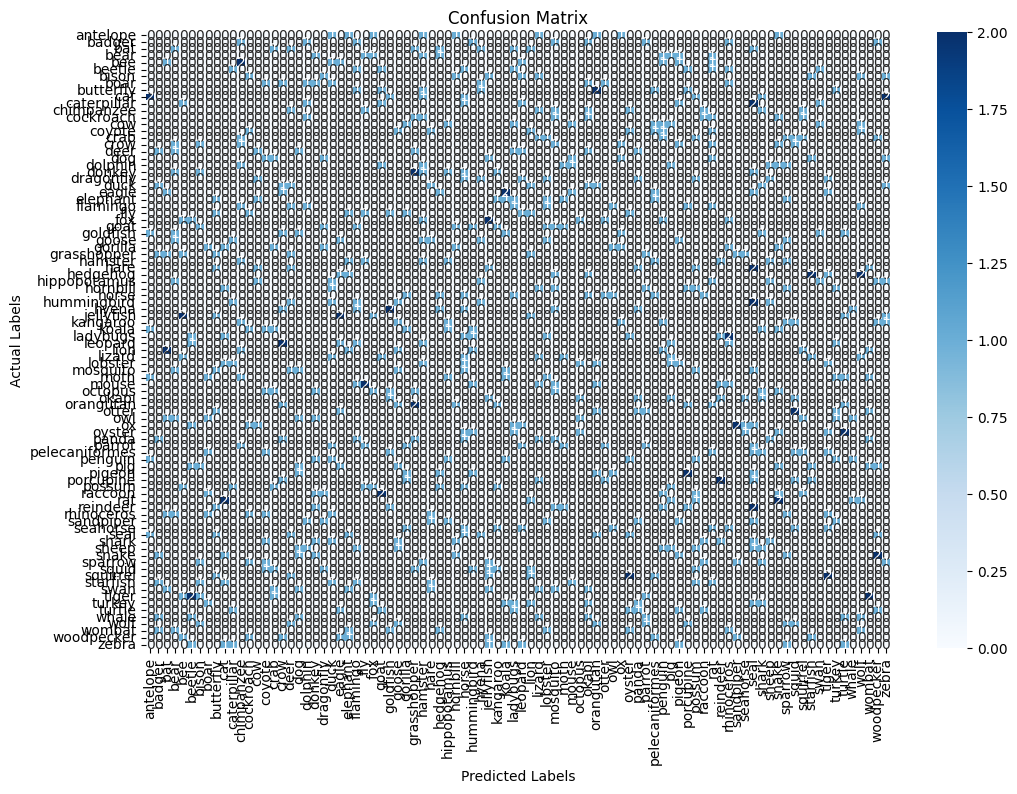

In [8]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get true labels and predicted labels
test_generator.reset()
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Get predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Step 2: Classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

# Step 3: Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],  # Optional extra augmentation
    channel_shift_range=20.0     # Optional extra augmentation
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model setup (using ResNet50 with pre-trained weights)
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(90, activation='softmax')  # Change number of units to match your classes
])

# Unfreeze the last few layers for fine-tuning (if needed)
base_model.trainable = True
# Optionally freeze earlier layers if needed
# for layer in base_model.layers[:100]:
#     layer.trainable = False

# Compile model with a suitable learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Found 3780 images belonging to 90 classes.
Found 810 images belonging to 90 classes.
Epoch 1/10
 48/119 ━━━━━━━━━━━━━━━━━━━━ 29:52 25s/step - accuracy: 0.0715 - loss: 4.4841

KeyboardInterrupt: 

In [12]:
print(train_generator.num_classes)
print(validation_generator.num_classes)


90
90


26/26 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step


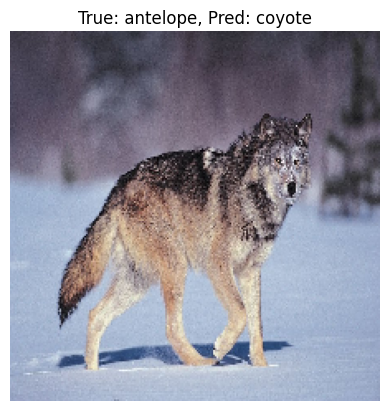

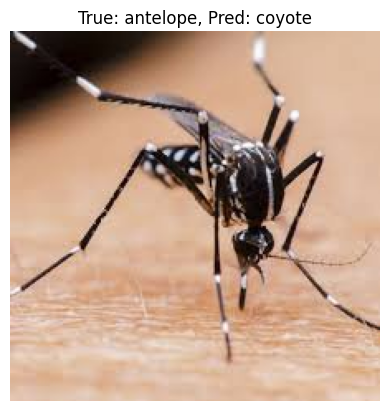

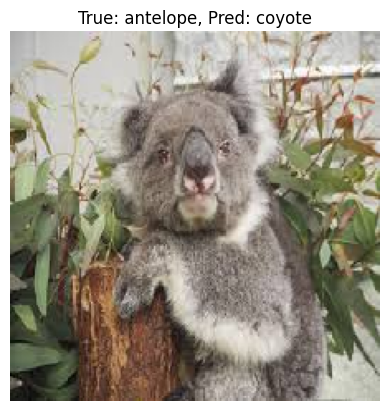

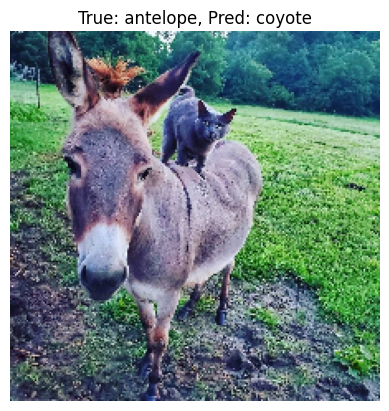

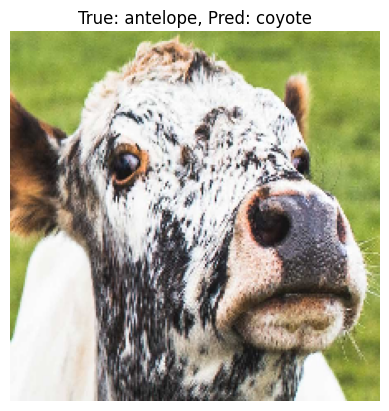

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions and true labels
y_pred = model.predict(validation_generator)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes  # True labels
class_labels = list(validation_generator.class_indices.keys())  # Class names

# Identify misclassified indices
misclassified_indices = np.where(y_pred_labels != y_true)[0]

# Visualize misclassified samples
for idx in misclassified_indices[:5]:  # Visualize up to 5 misclassified samples
    # Retrieve image and label
    img, _ = validation_generator[idx // validation_generator.batch_size]
    img = img[idx % validation_generator.batch_size]
    
    # Display the image
    plt.imshow(img)
    plt.title(
        f"True: {class_labels[y_true[idx]]}, Pred: {class_labels[y_pred_labels[idx]]}"
    )
    plt.axis('off')
    plt.show()
